In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [44]:
data = pd.read_excel('data\data_ford_price.xlsx') 

In [45]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

_______________________
Сторонний пример

In [46]:
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [47]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

___________________________________

In [48]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


In [49]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)

In [51]:
data_new = pd.concat([data, data_onehot], axis=1)

In [52]:
data_new = data_new.drop(columns_to_change, axis=1)

In [53]:
data_new.shape

(7017, 30)

In [54]:
data.isna().sum()

price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64

In [55]:
data[data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
18,32500,2015,3,6,73300,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
21,32700,2015,3,6,88500,clean,automatic,4wd,full-size,50.039078,-125.271885,NaN
53,53888,2018,4,8,10500,clean,automatic,4wd,NaN,49.172179,-123.076057,NaN
116,37995,2015,4,8,26903,clean,automatic,4wd,NaN,50.045346,-125.269028,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6865,38998,2014,3,6,86250,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
6921,49890,2018,4,6,1073,clean,automatic,4wd,NaN,49.204598,-123.139205,NaN
6937,10500,2006,3,8,131000,clean,automatic,4wd,NaN,-2.508807,-105.886335,NaN
6963,23888,2012,4,8,157887,clean,automatic,4wd,full-size,49.737705,-125.000103,NaN


In [56]:
data[data['weather'].isnull()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
18,32500,2015,3,6,73300,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
21,32700,2015,3,6,88500,clean,automatic,4wd,full-size,50.039078,-125.271885,NaN
53,53888,2018,4,8,10500,clean,automatic,4wd,NaN,49.172179,-123.076057,NaN
116,37995,2015,4,8,26903,clean,automatic,4wd,NaN,50.045346,-125.269028,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6865,38998,2014,3,6,86250,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
6921,49890,2018,4,6,1073,clean,automatic,4wd,NaN,49.204598,-123.139205,NaN
6937,10500,2006,3,8,131000,clean,automatic,4wd,NaN,-2.508807,-105.886335,NaN
6963,23888,2012,4,8,157887,clean,automatic,4wd,full-size,49.737705,-125.000103,NaN


In [57]:
data[data['size'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
8,18750,2011,2,6,77000,clean,automatic,rwd,NaN,33.698900,-84.745400,59.0
12,1700,2001,1,8,275000,clean,automatic,4wd,NaN,44.549400,-90.611200,45.0
25,35999,2016,3,8,25814,clean,automatic,4wd,NaN,43.852883,-88.855927,45.0
33,10000,2005,2,8,148000,clean,automatic,4wd,NaN,61.153500,-149.828900,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6983,3500,2004,1,8,179945,clean,automatic,rwd,NaN,40.010899,-74.131575,52.0
6987,22500,2014,3,6,91383,clean,automatic,4wd,NaN,43.223605,-76.802231,53.0
6991,6600,2010,2,8,101215,clean,automatic,rwd,NaN,43.098946,-76.097853,53.0
7007,28500,2014,3,8,40000,clean,automatic,4wd,NaN,36.562900,-82.653200,59.0


In [58]:
(7017 - 1564)/7017

0.7771127262362834

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [60]:
# удаляем столбцы с пропусками
X = X.dropna()

In [61]:
# из Х были удалены строки, соответственно приведем в соответствие Х и у
y = y.iloc[X.index]

In [62]:
X.shape[0] == y.shape[0]

True

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Проведём кодирование OneHot-методом категориальных переменных.
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [65]:
# Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:
X_train_one_hot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

one_hot_encoder = OneHotEncoder()

In [66]:
# Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:
X_test_one_hot = one_hot_encoder.fit_transform(X_test[columns_to_change]).toarray()

In [67]:
# Для удобства сохраним полученные названия новых колонок в отдельную переменную:
columns = one_hot_encoder.get_feature_names(columns_to_change)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
columns.shape

(18,)

In [69]:
X_train_one_hot.shape

(4161, 21)

In [70]:
X_test_one_hot.shape

(1041, 18)

Трансформация распределений признаков

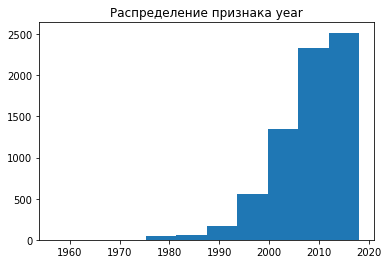

In [71]:
plt.hist(data.year)
plt.title('Распределение признака year');

In [72]:
from sklearn.preprocessing import QuantileTransformer

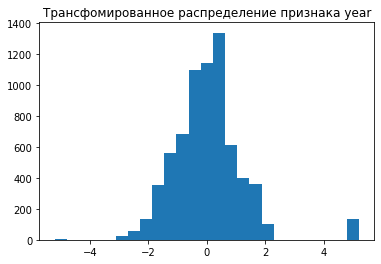

In [73]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку что мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape(len(data), 1)

quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)

plt.hist(data_transformed, bins=25)
plt.title('Трансфомированное распределение признака year')
plt.show()

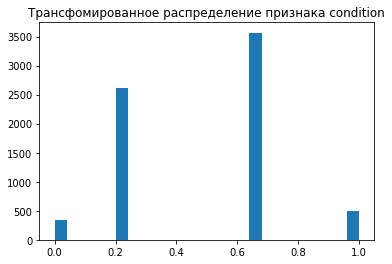

In [77]:
data_for_transform = data['condition'].values.reshape(len(data), 1)

quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)

plt.hist(data_transformed, bins=25)
plt.title('Трансфомированное распределение признака condition')
plt.show()

In [78]:
data_transformed[0]

array([0.96396396])

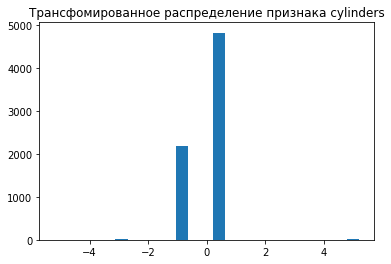

In [76]:
data_for_transform = data['cylinders'].values.reshape(len(data), 1)

quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)

plt.hist(data_transformed, bins=25)
plt.title('Трансфомированное распределение признака cylinders')
plt.show()

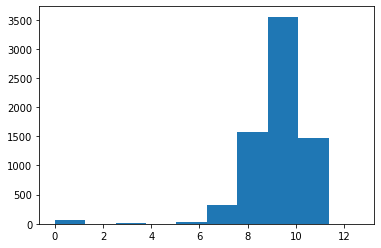

In [83]:
# Логарифмирование признаков
log_price = np.log(data['price'])

plt.hist(log_price);

In [84]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis=1)
price_data.tail(2)

,price,transformed_price
7015,10900,9.296518
7016,18000,9.798127


Power transformer scaler

In [85]:
from sklearn.preprocessing import PowerTransformer
box_cox = PowerTransformer(method='box-cox')

data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns=['transformed_price', 'transformed_year'])

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Даты и расстояния

In [86]:
from geopy.geocoders import Nominatim

In [87]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [88]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, Tennessee, 37663, United States


In [89]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

In [92]:
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

E&J Motors, Southeast Washington Street, Montavilla, Portland, Multnomah County, Oregon, 98215, United States


БОНУС

In [95]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
 
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

ModuleNotFoundError: No module named 'geopandas'